# Trabalho de IA e Machine Learning - TITANIC

## **Integrantes**

*   João Henrique de Oliveira
*   Avalone Cabrera
*   Christian Martins Teixeira



Primeiro, precisamos realizar as importações necessárias para o desenvolvimento do projeto, nele iremos usar a maioria que vimos em sala



*   Pandas - Biblioteca para manipular dados e planilhas
*   Numpy - Biblioteca de matemática de Python
*   Matplotlib - Biblioteca para gerações de gráficos
*   Seaborn - para utilização de gráficos também
*   SKlearn - para desenvolvimento do nosso modelo de IA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Após termos importado todas as ferramentas que iremos usar, podemos partir para o código

# Carregando os dados da planilha

Primeiramente, precisamos carregar todos os dados da nossa planilha para o python para isso usamos o panda read_csv

In [2]:
original_data = pd.read_csv('./sample_data/titanic.csv')
original_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


**Aqui será exibido as informações do Dataframe**

O Comando info(), serve para exibir dados sobre os campos criados

In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Aqui iremos verificar se existe algum campo que contem dados nulos

In [4]:
original_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Como retornou 0 em todos, significa que todos os campos da tabela estão preenchidos

***Como não apontou nenhum valor como Nulo ou NaN, não teremos dados para realizar tratamentos para preencher as colunas***

## Gráficos para a Analise de Informações

Aqui serão gerados gráficos para termos um entendimento melhor e mais simplificado, sobre muitos dados da nossa planilha

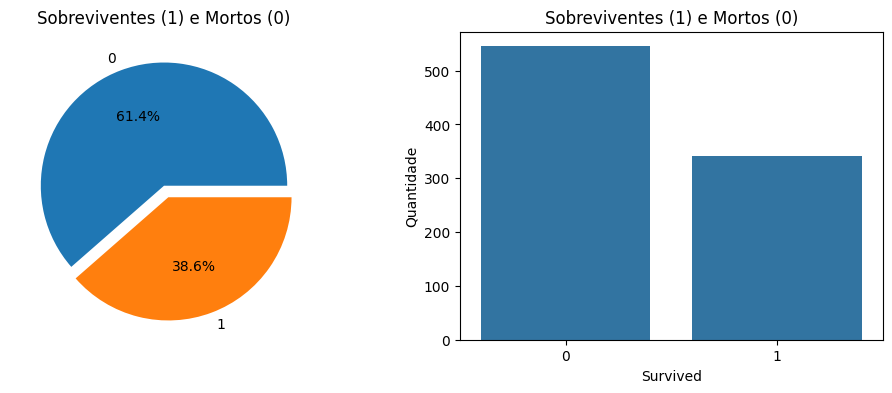

In [5]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
original_data['Survived'].value_counts().plot.pie(
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Sobreviventes (1) e Mortos (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=original_data, ax=ax[1])
ax[1].set_ylabel('Quantidade')
ax[1].set_title('Sobreviventes (1) e Mortos (0)')
plt.show()


Conforme os gráficos acima, podemos ver que mais de 60% das pessoas não sobreviveram ao Titanic, dado que foi informado em nossas tabelas no Campo survived, onde 0 era equivalente a não sobrevivente e 1 a sobrevivente
Aproximadamente pouco mais de 500 pessoas vieram a falecer

Outro fator que podemos ver que, pode nos ajudar no desenvolvimento de nosso modelo, é a verificação de % de pessoas de cada genêro que veio a sobreviver

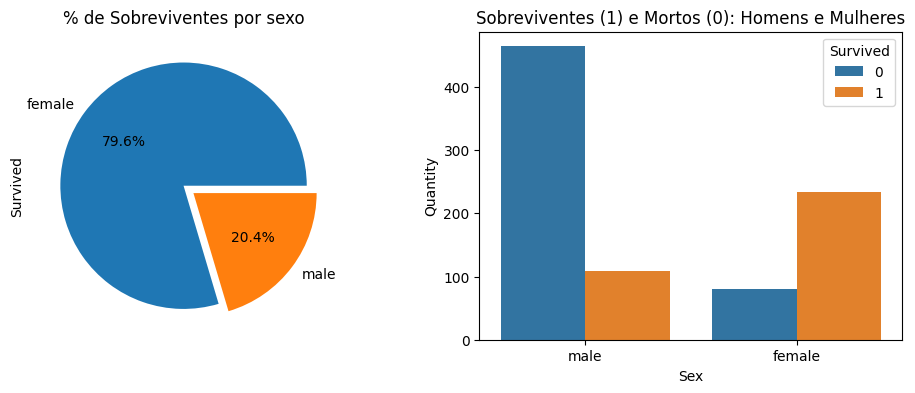

In [6]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
survival_by_sex = original_data[['Sex', 'Survived']].groupby(['Sex']).mean()['Survived']

survival_by_sex.plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('% de Sobreviventes por sexo')
sns.countplot(x='Sex', hue='Survived', data=original_data, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Sobreviventes (1) e Mortos (0): Homens e Mulheres')
plt.show()

De acordo com os gráficos, podemos ver que a grande maioria das mulheres sobreviveu, então podemos dizer que o sexo é um fator que pesa na hora da criação do nosso modelo

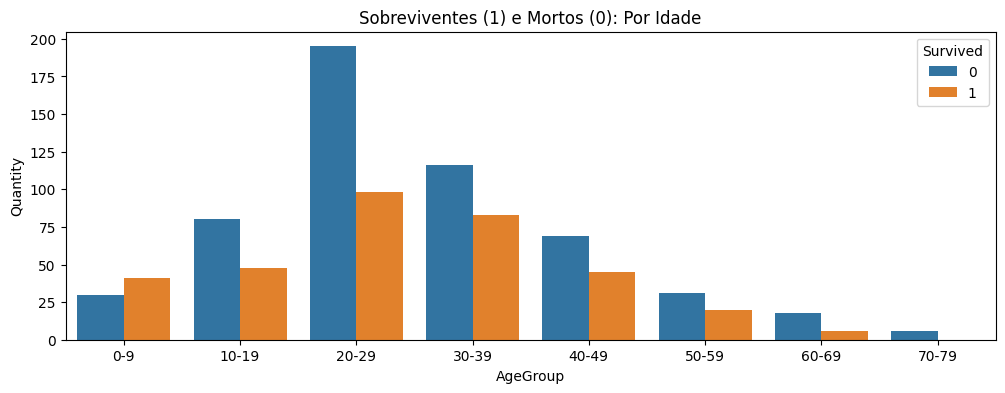

In [7]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new column with age groups
data_ageGroup = original_data.copy()
data_ageGroup['AgeGroup'] = pd.cut(original_data['Age'], bins=age_bins, labels=age_labels, right=False)

f, ax = plt.subplots(1,1, figsize=(12, 4))
sns.countplot(x='AgeGroup', hue='Survived', data=data_ageGroup, ax=ax)
ax.set_ylabel('Quantity')
ax.set_title('Sobreviventes (1) e Mortos (0): Por Idade')
plt.show()

Podemos ver no gráfico de sobreviventes por idade, que grande parte das crianças foram salvas, porém adultos dos 20-29 tiveram menor prioridade, do que pessoas de outras idades também

Iremos verificar a respeito das classes, para ver se isso tambem pode impactar

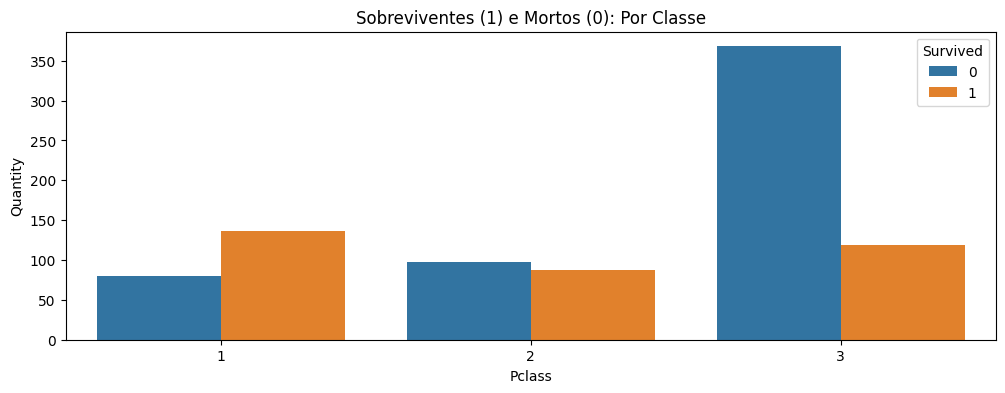

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.countplot(x='Pclass', hue='Survived', data=original_data, ax=ax)
ax.set_ylabel('Quantity')
ax.set_title('Sobreviventes (1) e Mortos (0): Por Classe')
plt.show()

Conforme o gráfico acima, podemos ver, que pessoas da 1ª e 2ª classe tiveram maior prioridade para sobreviver, enquanto grande parte das pessoas da 3ª classe vieram a falecer.

# Mapeamento das Colunas que podem influenciar na chance de sobrevivência

O Genero de uma pessoa, pode impactar na chance da pessoa ter sobrevivido, pois muitas vezes se dão prioridade a mulheres e crianças, então é algo que deve ser levado em consideração na hora do nosso treinamento, como os dados estão em forma de texto, irei converte-los em números, para ajudar no nosso treinamento.

Agora pessoas que tiverem 0 no Sex serão Homens, e pessoas que tiverem 1 são mulheres.

In [9]:
original_data['Sex'] = original_data['Sex'].map({'male': 0, 'female': 1})

In [10]:
original_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


Depois disso feito, iremos dividir nossa tabela agora em 2, uma tabela com as informações que serão utilizadas para realizar nossa previsão e 1 tabela contendo os resultados esperados/alvos que queremos, ou seja na tabela de resultado esperados colocaremos, nossa coluna Survived, enquanto na outra, deixaremos todas as informações, menos a survived

Na nossa tabela de informações tambem iremos tirar a coluna de Nomes, pois os nomes não influenciam na chance de sobrevivencia de uma pessoa.

In [11]:
infos = original_data.drop(['Survived','Name'], axis = 1)
alvo = original_data['Survived']

In [12]:
infos.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


Aqui temos nossa tabela, apenas com as informações númericas que poderão impactar no desenvolvimento de nosso modelo

In [13]:
alvo.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

E essa é a tabela apenas com os dados esperados

# Começando com os dados de teste e treinamento

Aqui iremos começar a realizar a divisão dos nossos dados, para isso iremos utilizar uma função do sklearn a train_test_split, que irá dividir nossos dados em grupos de teste e treinamento de acordo com uma porcentagem escolhida, eu irei separar 30% dos dados para o conjunto de teste.

Nossos dados ficarão como infos_train, infos_teste, alvos_train e alvos_teste

In [14]:
infos_train, infos_test, alvos_train, alvos_test = train_test_split(infos, alvo, test_size=0.3, random_state=42)

# Construindo nosso modelo e usando os dados para teste

Para nosso modelo irei usar as lógicas de KNN (K-Nearest Neighboor) e o DecisionThreeClassifier

## Construindo o Modelo KNN

Para isso, precisarei primeiro normalizar os dados de treino nosso utilizando o MinMaxScaler()


In [15]:
normalizador = MinMaxScaler()
infos_train_norm = normalizador.fit_transform(infos_train)
infos_test_norm = normalizador.transform(infos_test)

Os dados serão normalizados, numa Escala entre 0 e 1 conforme abaixo

In [16]:
print(f'Dados normalizados:\n{infos_train_norm}')

Dados normalizados:
[[0.         0.         0.64704399 0.         0.         0.05953204]
 [0.5        0.         0.45796042 0.         0.         0.        ]
 [1.         1.         0.34451027 0.25       0.         0.04538098]
 ...
 [0.5        0.         0.29408799 0.         0.         0.02537431]
 [0.         0.         0.79831085 0.125      0.8        0.51334181]
 [1.         0.         0.40753813 0.         0.         0.01689187]]


Logo após termos os dados normalizados, iremos continuar a construção do nosso modelo KNN
Passando o número de vizinhos em que ele pode procurar, e realizando o treinamento passando nossas variaveis e resultados esperados

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(infos_train_norm, alvos_train)
print(f"Precisão de treinamento: {knn.score(infos_train_norm, alvos_train)}")

Precisão de treinamento: 0.8919354838709678


Aqui estou criando uma variavel de previsão dos resultados do nosso conjunto de testes

E também usando funções para calcular a Acurácia, Precisão, Recall e F1 Score

In [18]:
print(f"Precisão do teste: { knn.score(infos_test_norm, alvos_test)}")
alvo_pred_knn = knn.predict(infos_test)


knn_accuracy = accuracy_score(alvos_test, alvo_pred_knn)
knn_precision = precision_score(alvos_test, alvo_pred_knn)
knn_recall = recall_score(alvos_test, alvo_pred_knn)
knn_f1 = f1_score(alvos_test, alvo_pred_knn)


Precisão do teste: 0.797752808988764


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Feito isso, agora iremos ver os resultados gerais do nosso treinamento/teste

### Resultados do Modelo KNN

In [19]:
print(f'Acurácia: {knn_accuracy}')
print(f'Precisão: {knn_precision}')
print(f'Recall: {knn_recall}')
print(f'F1-Score: {knn_f1}')


Acurácia: 0.6853932584269663
Precisão: 0.5691056910569106
Recall: 0.693069306930693
F1-Score: 0.625


## Construindo o Modelo de Decision Three Classifier

Aqui iremos construir nosso modelo de Decision Three, nele irei definir sua pronfundidade maxima em 5, que é a quantidade máxima de profundidade que ela pode ter e passando nossos dados de treino para ela

In [20]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(infos_train, alvos_train)

print(f"Precisão de treinamento: {dtc.score(infos_train, alvos_train)}")

Precisão de treinamento: 0.8758064516129033


In [21]:
print(f"Precisão do teste: { dtc.score(infos_test_norm, alvos_test)}")
alvo_pred_dtc = dtc.predict(infos_test)


dtc_accuracy = accuracy_score(alvos_test, alvo_pred_dtc)
dtc_precision = precision_score(alvos_test, alvo_pred_dtc)
dtc_recall = recall_score(alvos_test, alvo_pred_dtc)
dtc_f1 = f1_score(alvos_test, alvo_pred_dtc)


Precisão do teste: 0.6104868913857678


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Resultados do Modelo Decision Three Classifier


In [22]:
print(f'Acurácia: {dtc_accuracy}')
print(f'Precisão: {dtc_precision}')
print(f'Recall: {dtc_recall}')
print(f'F1-Score: {dtc_f1}')

Acurácia: 0.797752808988764
Precisão: 0.7831325301204819
Recall: 0.6435643564356436
F1-Score: 0.7065217391304347


Podemos ver que nosso modelo com Arvore de Decisão, teve um melhor desempenho nos resultados comparado ao KNN, então será ele que iremos fazer a melhoria do modelo

# Melhorando nosso Modelo de Decision Three Classifier

para isso precisamos definir paramêtros para ele realizar a busca e ver qual seriam as melhores opções, para isso vamos usar o GridSearchCV do sklearn

Nisso iremos realizar a busca e depois treina-la

In [23]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(infos_train, alvos_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

Depois de realizarmos a busca, que pode levar um tempo razoavel para executar, podemos ver, quais são os melhores paramêtros que podemos usar no Nosso modelo de Decision Three

In [24]:
print("Melhores parâmetros para DTC:", grid_search.best_params_)

Melhores parâmetros para DTC: {'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 2}


Com os paramêtros ja encontrados, precisaremos retreinar nossa IA utilizando eles, para obter um melhor resultado.

In [25]:
dtc_melhor = grid_search.best_estimator_
dtc_melhor.fit(infos_train, alvos_train)

print(f"Precisão de treinamento: {dtc_melhor.score(infos_train, alvos_train)}")

Precisão de treinamento: 0.8741935483870967


A precisão do nosso treinamento manteve similar a antiga, agora vamos ver os outros resultados

In [26]:
print(f"Precisão do teste: { dtc_melhor.score(infos_test, alvos_test)}")
alvo_pred_dtc_melhor = dtc_melhor.predict(infos_test)

dtc_melhor_accuracy = accuracy_score(alvos_test, alvo_pred_dtc_melhor)
dtc_melhor_precision = precision_score(alvos_test, alvo_pred_dtc_melhor)
dtc_melhor_recall = recall_score(alvos_test, alvo_pred_dtc_melhor)
dtc_melhor_f1 = f1_score(alvos_test, alvo_pred_dtc_melhor)

Precisão do teste: 0.8014981273408239


In [27]:
print("Resultados Anteriores")
print(f'Acurácia: {dtc_accuracy}')
print(f'Precisão: {dtc_precision}')
print(f'Recall: {dtc_recall}')
print(f'F1-Score: {dtc_f1}')
print('')
print("Resultados do melhor modelo de Decision Three Classifier:")
print(f'Acurácia: {dtc_melhor_accuracy}')
print(f'Precisão: {dtc_melhor_precision}')
print(f'Recall: {dtc_melhor_recall}')
print(f'F1-Score: {dtc_melhor_f1}')

Resultados Anteriores
Acurácia: 0.797752808988764
Precisão: 0.7831325301204819
Recall: 0.6435643564356436
F1-Score: 0.7065217391304347

Resultados do melhor modelo de Decision Three Classifier:
Acurácia: 0.8014981273408239
Precisão: 0.8428571428571429
Recall: 0.5841584158415841
F1-Score: 0.6900584795321637


Podemos perceber que teve uma pequena melhora na Acurácia e uma Melhora de maior expressão na precisão do Modelo

# Determinando os sobreviventes, a partir do Modelo Criado

Agora que ja Melhoramos nosso Modelo, precisamos exportar um relatório, dizendo quais foram os sobreviventes do Titanic

Para isso iremos exportar uma planilha do Excel contendo o Nome da Pessoa e se ela sobreviveu ou não e também precisaremos juntar nossas tabelas para, ou criar uma nova, uma vez que haviamos a dividido anteriormente para realizar os testes, porém agora precisaremos dela inteira para definir, quem sobreviveu e quem foi salvo.

In [33]:
tabela_final_dados = original_data.drop(['Survived','Name'], axis = 1)
passageiros = original_data['Name']

Aqui iremos fazer um map na tabela Final, para ver se a pessoa Morreu, ou sobreviveu, considerando que 0 = Morreu e 1 Sobreviveu

In [34]:
previsao = dtc_melhor.predict(tabela_final_dados)
previsao_convertida = pd.Series(previsao).map({0: 'Morreu', 1: 'Sobreviveu'})

E Aqui estamos mapeando novamente o Sexo da pessoa, para que volte ao tipo de caractere, uma vez que facilita a visualização da pessoa

In [35]:
sexo_convertido = pd.Series(original_data['Sex']).map({0: 'Masculino', 1: 'Feminino'})

No Trecho a seguir, iremos utilizer o comando para criar um dataframe com os resultados obtidos

In [36]:
csv_final = pd.DataFrame({'Survived': previsao_convertida, 'Name': passageiros,'Sex': sexo_convertido, 'Age': original_data["Age"] })
csv_final.to_csv('titanic_final.csv', index=False)

Após isso, teremos um arquivo CSV com algumas informações do tripulante e se o mesmo Sobreviveu ou Morreu.